In [3]:
using Printf
using Plots; gr()

Plots.GRBackend()

In [4]:
"Run a Cmd object, returning the stdout & stderr contents plus the exit code"
function execute(cmd::Cmd)
  out = Pipe()
  err = Pipe()

  process = run(pipeline(ignorestatus(cmd), stdout=out, stderr=err))
  close(out.in)
  close(err.in)

  (
    stdout = String(read(out)), 
    stderr = String(read(err)),  
    code = process.exitcode
  )
end

execute

In [5]:
function pingstats(machine::String, num::Int, verbose::String)
    out = Vector{Float64}(undef, num)
    
    for i in 1:num
        cmd = is_windows() ? `ping $machine -n 1` : `ping $machine -c 1 -s 64 -i 1`
        output, err, code = execute(`$cmd`)
        
        if occursin("time=", output)
            found = match(r"time=(\d+(?:\.\d+)?) ms", output)
            if found !== nothing
                time_ms = parse(Float64, found.captures[1])
                out[i] = time_ms
                if verbose != ""
                    @printf("Ping %d\n", i)
                end
            end
        end
    end
    
    return out
end

pingstats (generic function with 1 method)

In [6]:
function is_windows()
    return Sys.iswindows()
end


is_windows (generic function with 1 method)

In [7]:
# Example usage:
# stats = pingstats("isl.stanford.edu", 100, "v")
# or
# stats = pingstats("www.google.com", 100, "v")
stats = pingstats("isl.stanford.edu", 100, "")

100-element Vector{Float64}:
 160.863
 160.924
 160.442
 165.553
 160.172
 160.547
 160.518
 160.33
 159.652
 160.853
 160.188
 159.992
 160.91
   ⋮
 160.121
 161.422
 159.67
 158.739
 159.67
 160.407
 160.044
 160.165
 159.868
 160.274
 160.366
 159.274

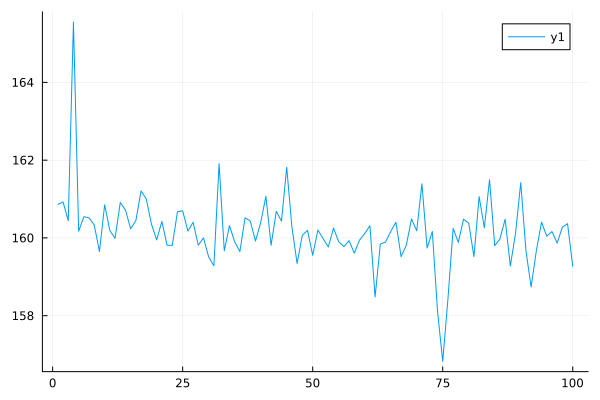

In [8]:
plot(stats)

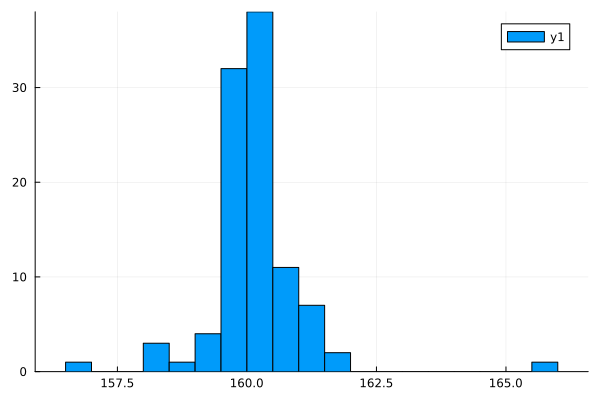

In [9]:
using StatsPlots
histogram(stats)

# References

- [ ] [Collecting all output from shell commands](https://discourse.julialang.org/t/collecting-all-output-from-shell-commands/15592/2)
- [ ] [Review of the Mathematics of Logistic Regression via MLE](https://github.com/johnmyleswhite/julia_tutorials/blob/master/Statistics%20in%20Julia%20-%20Maximum%20Likelihood%20Estimation.ipynb)